In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import warnings

# Filter out DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Mounted at /content/drive


In [ ]:
!pip install nnunetv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.1/184.1 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.5/39.5 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 15.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
 

In [ ]:
import nibabel as nib
import numpy as np
import os
import pickle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import zipfile
import pathlib
import shutil
import json
from PIL import Image
from skimage import measure

In [ ]:
"""
    This function extracts a zip file containing the BRATS dataset
    and prepares the necessary directories for processing.
"""

def extract_zip_and_prepare_folders():
  z = zipfile.ZipFile('/content/drive/MyDrive/dataset_brats/archive.zip')
  z.extractall()

extract_zip_and_prepare_folders()

In [ ]:
# Define the directories for training and validation datasets
dataset_dir = '/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'

# List all folders in the training dataset directory, excluding any CSV files
patients_folders = [dir for dir in os.listdir(dataset_dir) if not dir.endswith('csv')]

# Define the directories for training and validation dataset
dataset_val_dir = '/content/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

# List all folders in the training dataset directory, excluding any CSV files
patients_folders_vals = [dir for dir in os.listdir(dataset_val_dir) if not dir.endswith('csv')]

In [ ]:
patients_folders.sort()
patients_folders_vals.sort()

In [ ]:
# Get the current directory path
here = pathlib.Path('.').resolve()

# Define the paths for nnUNet directories
nnUNet_raw = here.joinpath('nnUNet_raw')
nnUNet_preprocessed = here.joinpath('nnUNet_preprocessed')
nnUNet_results = here.joinpath('nnUNet_results')

# Create the nnUNet directories if they do not exist, along with any necessary parent directories
nnUNet_raw.mkdir(exist_ok=True, parents=True)

In [ ]:
# Set environment variables for nnUNet directories
os.environ["nnUNet_raw"] = str(nnUNet_raw)
os.environ["nnUNet_preprocessed"] = str(nnUNet_preprocessed)
os.environ["nnUNet_results"] = str(nnUNet_results)

In [ ]:
# Create folders
os.mkdir("/content/nnUNet_raw/Dataset001_BrainTumour")
os.mkdir("/content/nnUNet_raw/Dataset001_BrainTumour/imagesTr")
os.mkdir("/content/nnUNet_raw/Dataset001_BrainTumour/imagesTs")
os.mkdir("/content/nnUNet_raw/Dataset001_BrainTumour/labelsTr")

In [ ]:
# shutil.rmtree("/content/nnUNet_raw")

In [ ]:
SRC_DIR_TR = "/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
SRC_DIR_TS = "/content/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData"

TARGET_DIR_TR= "/content/nnUNet_raw/Dataset001_BrainTumour/imagesTr"
TARGET_DIR_TS= "/content/nnUNet_raw/Dataset001_BrainTumour/imagesTs"
TARGET_DIR_LABELS= "/content/nnUNet_raw/Dataset001_BrainTumour/labelsTr"

In [ ]:
count = 1
training = []
modalities = {"flair":"0000","t1":"0001","t1ce":"0002","t2":"0003"}
for patient in patients_folders[:60]:
    label_name = f"BRATS_{count :03d}.nii"
    for modality in modalities.keys():
      img_name = f"BRATS_{count :03d}_{modalities[modality]}.nii"
      shutil.copy(os.path.join(SRC_DIR_TR, patient, patient+f"_{modality}" + ".nii"), os.path.join(TARGET_DIR_TR,img_name))
      training.append({"image":f"./imagesTr/{img_name}", "label":f"./labelsTr/{label_name}"})

    shutil.copy(os.path.join(SRC_DIR_TR, patient, patient+f"_seg" + ".nii"), os.path.join(TARGET_DIR_LABELS,label_name))

    count += 1

In [ ]:
test = []
count = 1
for patient in patients_folders_vals[:30]:
    for modality in modalities.keys():
      img_name = f"BRATS_{count :03d}_{modalities[modality]}.nii"
      shutil.copy(os.path.join(SRC_DIR_TS, patient, patient+f"_{modality}" + ".nii"), os.path.join(TARGET_DIR_TS,img_name))
    test.append({"image":f"./imagesTs/{img_name}"})
    count += 1

In [ ]:
print(training)
print(test)

[{'image': './imagesTr/BRATS_001_0000.nii', 'label': './labelsTr/BRATS_001.nii'}, {'image': './imagesTr/BRATS_001_0001.nii', 'label': './labelsTr/BRATS_001.nii'}, {'image': './imagesTr/BRATS_001_0002.nii', 'label': './labelsTr/BRATS_001.nii'}, {'image': './imagesTr/BRATS_001_0003.nii', 'label': './labelsTr/BRATS_001.nii'}, {'image': './imagesTr/BRATS_002_0000.nii', 'label': './labelsTr/BRATS_002.nii'}, {'image': './imagesTr/BRATS_002_0001.nii', 'label': './labelsTr/BRATS_002.nii'}, {'image': './imagesTr/BRATS_002_0002.nii', 'label': './labelsTr/BRATS_002.nii'}, {'image': './imagesTr/BRATS_002_0003.nii', 'label': './labelsTr/BRATS_002.nii'}, {'image': './imagesTr/BRATS_003_0000.nii', 'label': './labelsTr/BRATS_003.nii'}, {'image': './imagesTr/BRATS_003_0001.nii', 'label': './labelsTr/BRATS_003.nii'}, {'image': './imagesTr/BRATS_003_0002.nii', 'label': './labelsTr/BRATS_003.nii'}, {'image': './imagesTr/BRATS_003_0003.nii', 'label': './labelsTr/BRATS_003.nii'}, {'image': './imagesTr/BRATS

In [ ]:
import gzip

def compress_nii_files(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".nii"):
                nii_path = os.path.join(root, file)
                gz_path = nii_path + ".gz"
                with open(nii_path, 'rb') as f_in:
                    with gzip.open(gz_path, 'wb') as f_out:
                        shutil.copyfileobj(f_in, f_out)
                os.remove(nii_path)  # Orijinal .nii dosyasını kaldırmak isterseniz bu satırı ekleyin

# Eğitim ve test dizinlerini sıkıştırma
compress_nii_files('/content/nnUNet_raw/Dataset001_BrainTumour/imagesTr')
compress_nii_files('/content/nnUNet_raw/Dataset001_BrainTumour/labelsTr')
compress_nii_files('/content/nnUNet_raw/Dataset001_BrainTumour/imagesTs')

In [ ]:
import SimpleITK as sitk

def copy_BraTS_segmentation_and_convert_labels_to_nnUNet(in_file: str, out_file: str) -> None:
    # use this for segmentation only!!!
    # nnUNet wants the labels to be continuous. BraTS is 0, 1, 2, 4 -> we make that into 0, 1, 2, 3
    img = sitk.ReadImage(in_file)
    img_npy = sitk.GetArrayFromImage(img)

    uniques = np.unique(img_npy)
   # Round floating values to nearest integers
    seg_data_int = seg_data.round().astype(int)
    for u in uniques:
        print("U: ",u)
        if u not in [0, 1, 2, 3,4]:
            raise RuntimeError('unexpected label')

    seg_new = np.zeros_like(img_npy)
    seg_new[img_npy == 4] = 3
    seg_new[img_npy == 2] = 1
    seg_new[img_npy == 1] = 2
    img_corr = sitk.GetImageFromArray(seg_new)
    img_corr.CopyInformation(img)
    sitk.WriteImage(img_corr, out_file)


In [ ]:
def fix_labels(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".nii.gz"):
                file_path = os.path.join(root, file)
                # copy_BraTS_segmentation_and_convert_labels_to_nnUNet(file_path,file_path)
                img = nib.load(file_path)
                img_data = img.get_fdata()

                # Hatalı etiketleri düzeltme
                img_data[img_data == 4] = 3

                # Yeni etiketi kaydetme
                corrected_img = nib.Nifti1Image(img_data, img.affine, img.header)
                nib.save(corrected_img, file_path)
                print(f"Fixed labels in file: {file_path}")

# Eğitim etiketlerini düzeltme
# fix_labels('/content/nnUNet_raw/Dataset001_BrainTumour/imagesTr')
fix_labels('/content/nnUNet_raw/Dataset001_BrainTumour/labelsTr')
# fix_labels('/content/nnUNet_raw/Dataset001_BrainTumour/imagesTs')

Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_041.nii.gz
Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_008.nii.gz
Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_003.nii.gz
Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_005.nii.gz
Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_020.nii.gz
Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_021.nii.gz
Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_032.nii.gz
Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_060.nii.gz
Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_011.nii.gz
Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_044.nii.gz
Fixed labels in file: /content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/BRATS_036.nii.gz

In [ ]:
from typing import Tuple

from batchgenerators.utilities.file_and_folder_operations import save_json, join


def generate_dataset_json(output_folder: str,
                          channel_names: dict,
                          labels: dict,
                          num_training_cases: int,
                          file_ending: str,
                          regions_class_order: Tuple[int, ...] = None,
                          dataset_name: str = None, reference: str = None, release: str = None, license: str = None,
                          description: str = None,
                          overwrite_image_reader_writer: str = None, **kwargs):
    has_regions: bool = any([isinstance(i, (tuple, list)) and len(i) > 1 for i in labels.values()])
    if has_regions:
        assert regions_class_order is not None, f"You have defined regions but regions_class_order is not set. " \
                                                f"You need that."
    # channel names need strings as keys
    keys = list(channel_names.keys())
    for k in keys:
        if not isinstance(k, str):
            channel_names[str(k)] = channel_names[k]
            del channel_names[k]

    # labels need ints as values
    for l in labels.keys():
        value = labels[l]
        if isinstance(value, (tuple, list)):
            value = tuple([int(i) for i in value])
            labels[l] = value
        else:
            labels[l] = int(labels[l])

    dataset_json = {
        'channel_names': channel_names,  # previously this was called 'modality'. I didn't like this so this is
        # channel_names now. Live with it.
        'labels': labels,
        'numTraining': num_training_cases,
        'file_ending': file_ending,
    }

    if dataset_name is not None:
        dataset_json['name'] = dataset_name
    if reference is not None:
        dataset_json['reference'] = reference
    if release is not None:
        dataset_json['release'] = release
    if license is not None:
        dataset_json['licence'] = license
    if description is not None:
        dataset_json['description'] = description
    if overwrite_image_reader_writer is not None:
        dataset_json['overwrite_image_reader_writer'] = overwrite_image_reader_writer
    if regions_class_order is not None:
        dataset_json['regions_class_order'] = regions_class_order

    dataset_json.update(kwargs)

    save_json(dataset_json, join(output_folder, 'dataset.json'), sort_keys=False)

In [ ]:
channels= {
        "0": "FLAIR",
        "1": "T1",
        "2": "T1ce",
        "3": "T2"
    }
labels= {
    "background": 0,
    "whole_tumor": [1, 2, 3],
    "tumor_core": [2, 3],
    "enhancing_tumor": [3] # or [3]
}
region =  [1, 2, 3]
args={
    "train":training,
    "test":test,
    "description": "Brain Tumor Segmentation 2020",
    "reference": "https://www.med.upenn.edu/cbica/brats2020/",
    "licence": "see https://www.med.upenn.edu/sbia/brats2020/data.html",
    "release": "0",
    }
generate_dataset_json("/content/nnUNet_raw/Dataset001_BrainTumour",channels, labels, 55, ".nii.gz",region, "dataset_name=""BraTS2020",**args)

In [ ]:
broken_labels=["BRATS_002","BRATS_007","BRATS_008","BRATS_012","BRATS_016","BRATS_035","BRATS_057","BRATS_054"]

def delete_broken_labels_and_files(training,test,broken_labels):
    for label in broken_labels:
      print(label)
      training = [file for file in training if not file['image'].startswith(f"./imagesTr/{label}")]
      test = [file for file in test if not file['image'].startswith(f"./imagesTs/{label}")]

    return training,test

training,test = delete_broken_labels_and_files(training,test,broken_labels)
print(training)

BRATS_002
BRATS_007
BRATS_008
BRATS_012
BRATS_016
BRATS_035
BRATS_057
BRATS_054
[{'image': './imagesTr/BRATS_001_0000.nii', 'label': './labelsTr/BRATS_001.nii'}, {'image': './imagesTr/BRATS_001_0001.nii', 'label': './labelsTr/BRATS_001.nii'}, {'image': './imagesTr/BRATS_001_0002.nii', 'label': './labelsTr/BRATS_001.nii'}, {'image': './imagesTr/BRATS_001_0003.nii', 'label': './labelsTr/BRATS_001.nii'}, {'image': './imagesTr/BRATS_003_0000.nii', 'label': './labelsTr/BRATS_003.nii'}, {'image': './imagesTr/BRATS_003_0001.nii', 'label': './labelsTr/BRATS_003.nii'}, {'image': './imagesTr/BRATS_003_0002.nii', 'label': './labelsTr/BRATS_003.nii'}, {'image': './imagesTr/BRATS_003_0003.nii', 'label': './labelsTr/BRATS_003.nii'}, {'image': './imagesTr/BRATS_004_0000.nii', 'label': './labelsTr/BRATS_004.nii'}, {'image': './imagesTr/BRATS_004_0001.nii', 'label': './labelsTr/BRATS_004.nii'}, {'image': './imagesTr/BRATS_004_0002.nii', 'label': './labelsTr/BRATS_004.nii'}, {'image': './imagesTr/BRATS_

In [ ]:
for label in broken_labels:
  try:
    for i in ["0000","0001","0002","0003"]:
      os.remove(f"/content/nnUNet_raw/Dataset001_BrainTumour/imagesTr/{label}_{i}.nii.gz")
      os.remove(f"/content/nnUNet_raw/Dataset001_BrainTumour/imagesTs/{label}_{i}.nii.gz")
    os.remove(f"/content/nnUNet_raw/Dataset001_BrainTumour/labelsTr/{label}.nii.gz")
  except FileNotFoundError:
    continue

In [ ]:
import os
import numpy as np
import nibabel as nib

# Eksik modaliteleri tamamlayan fonksiyon
def complete_missing_modalities(patient_ids, target_dir, modalities=["0000", "0001", "0002", "0003"]):
    for patient_id in patient_ids:
        existing_modalities = [file.split('_')[-1].replace('.nii.gz', '') for file in os.listdir(target_dir) if patient_id in file]
        missing_modalities = [mod for mod in modalities if mod not in existing_modalities]

        for modality in missing_modalities:
            file_name = f"{patient_id}_{modality}.nii.gz"
            file_path = os.path.join(target_dir, file_name)
            if not os.path.exists(file_path):
                print(f"Creating missing file: {file_path}")
                # Boş bir dosya oluşturarak tamamlıyoruz
                img_shape = (240, 240, 155)  # Tipik BraTS boyutu
                empty_img = np.zeros(img_shape, dtype=np.int16)
                nib.save(nib.Nifti1Image(empty_img, np.eye(4)), file_path)

# Eksik modaliteleri tamamla
missing_patients = ['BRATS_035', 'BRATS_054', 'BRATS_057']
image_dir = "/content/nnUNet_raw/Dataset001_BrainTumour/imagesTr"
complete_missing_modalities(missing_patients, image_dir)

print("Eksik modaliteler tamamlandı.")


Creating missing file: /content/nnUNet_raw/Dataset001_BrainTumour/imagesTr/BRATS_035_0000.nii.gz
Creating missing file: /content/nnUNet_raw/Dataset001_BrainTumour/imagesTr/BRATS_054_0000.nii.gz
Creating missing file: /content/nnUNet_raw/Dataset001_BrainTumour/imagesTr/BRATS_057_0000.nii.gz
Eksik modaliteler tamamlandı.


In [ ]:
!nnUNetv2_plan_and_preprocess -d 1 --verify_dataset_integrity

Fingerprint extraction...
Dataset001_BrainTumour
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
WARNING! Not all input images have the same origin!
Origins:
[(0.0, 0.0, 0.0), (-0.0, -239.0, 0.0), (-0.0, -239.0, 0.0), (-0.0, -239.0, 0.0)]
Image files:
['/content/nnUNet_raw/Dataset001_BrainTumour/imagesTr/BRATS_035_0000.nii.gz', '/content/nnUNet_raw/Dataset001_BrainTumour/imagesTr/BRATS_035_0001.nii.gz', '/content/nnUNet_raw/Dataset001_BrainTumour/imagesTr/BRATS_035_0002.nii.gz', '/content/nnUNet_raw/Dataset001_BrainTumour/imagesTr/BRATS_035_0003.nii.gz']
It is up to you to decide whether that's a problem. You should run nnUNetv2_plot_overlay_pngs to verify that segmentations and data overlap.
WARNING! Not all input images have the same direction!
Directions:
[(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)]
Im

In [ ]:
!nnUNetv2_train 1 3d_fullres 0


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2024-06-20 22:59:23.071235: do_dummy_2d_data_aug: False
2024-06-20 22:59:23.072023: Using splits from existing split file: /content/nnUNet_preprocessed/Dataset001_BrainTumour/splits_final.json
2024-06-20 22:59:23.072238: The split file contains 5 splits.
2024-06-20 22:59:23.072306: Desired fold 

In [ ]:
!nnUNetv2_find_best_configuration 1 -c 3d_fullres -h

usage: nnUNetv2_find_best_configuration [-h] [-p P [P ...]] [-c C [C ...]] [-tr TR [TR ...]]
                                        [-np NP] [-f F [F ...]] [--disable_ensembling]
                                        [--no_overwrite]
                                        dataset_name_or_id

positional arguments:
  dataset_name_or_id    Dataset Name or id

options:
  -h, --help            show this help message and exit
  -p P [P ...]          List of plan identifiers. Default: nnUNetPlans
  -c C [C ...]          List of configurations. Default: ['2d', '3d_fullres', '3d_lowres',
                        '3d_cascade_fullres']
  -tr TR [TR ...]       List of trainers. Default: nnUNetTrainer
  -np NP                Number of processes to use for ensembling, postprocessing etc
  -f F [F ...]          Folds to use. Default: 0 1 2 3 4
  --disable_ensembling  Set this flag to disable ensembling
  --no_overwrite        If set we will not overwrite already ensembled files etc. May speed up
 

In [ ]:
# checkpoint_best.pth dosyasını checkpoint_final.pth olarak yeniden adlandırma
!cp /content/nnUNet_results/Dataset001_BrainTumour/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/checkpoint_best.pth /content/nnUNet_results/Dataset001_BrainTumour/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/checkpoint_final.pth


In [ ]:
!nnUNetv2_find_best_configuration 1 -c 3d_fullres -h

usage: nnUNetv2_find_best_configuration [-h] [-p P [P ...]] [-c C [C ...]] [-tr TR [TR ...]]
                                        [-np NP] [-f F [F ...]] [--disable_ensembling]
                                        [--no_overwrite]
                                        dataset_name_or_id

positional arguments:
  dataset_name_or_id    Dataset Name or id

options:
  -h, --help            show this help message and exit
  -p P [P ...]          List of plan identifiers. Default: nnUNetPlans
  -c C [C ...]          List of configurations. Default: ['2d', '3d_fullres', '3d_lowres',
                        '3d_cascade_fullres']
  -tr TR [TR ...]       List of trainers. Default: nnUNetTrainer
  -np NP                Number of processes to use for ensembling, postprocessing etc
  -f F [F ...]          Folds to use. Default: 0 1 2 3 4
  --disable_ensembling  Set this flag to disable ensembling
  --no_overwrite        If set we will not overwrite already ensembled files etc. May speed up
 

In [ ]:
# Tahmin işlemini başlatma
!nnUNetv2_predict -i /content/nnUNet_raw/Dataset001_BrainTumour/imagesTs -o /content/predictions -d 1 -c 3d_fullres --save_probabilities -f 0



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 25 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 25 cases that I would like to predict

Predicting BRATS_001:
perform_everything_on_device: True
100% 8/8 [00:05<00:00,  1.51it/s]
sending off prediction to background worker for resampling and export
done with BRATS_001

Predicting BRATS_003:
perform_everything_on_device: True
100% 8/8 [00:03<00:00,  2.01it/s]
sending off prediction to background worker for resampling and export
done with BRATS_003

Predicting BRATS_004:
perform_everything_on_device: True
100% 8/8 [00:0

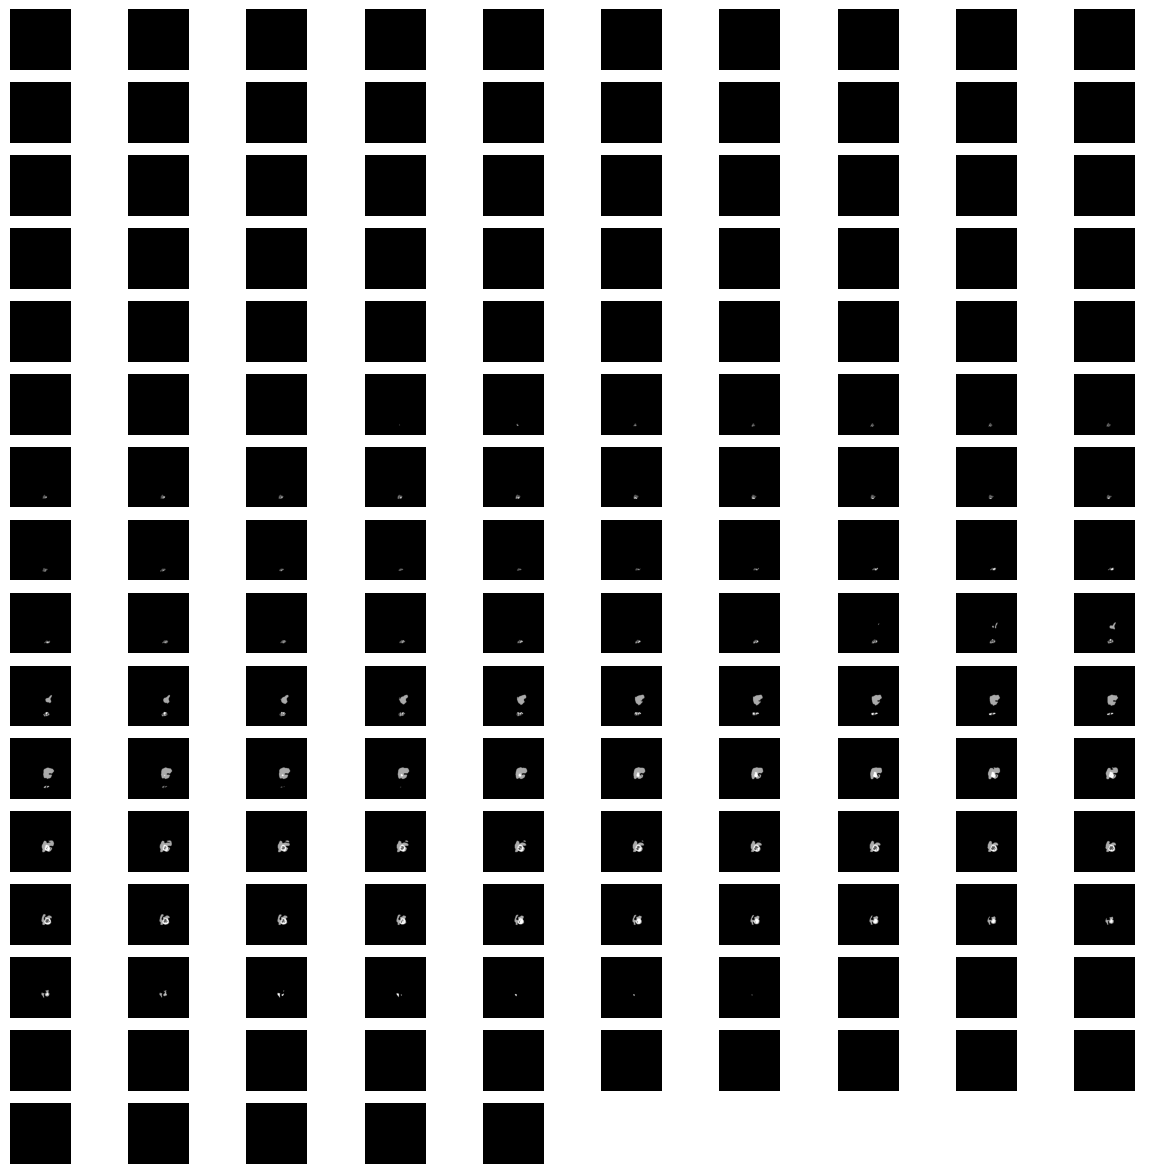

In [ ]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, jaccard_score
from scipy.spatial.distance import dice
import nibabel as nib
import numpy as np
import os

def show_prediction(prediction_dir, file_name):
    file_path = os.path.join(prediction_dir, file_name)
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist.")
        return

    img = sitk.ReadImage(file_path)
    img_array = sitk.GetArrayFromImage(img)

    # Adjust subplot dimensions
    n_slices = img_array.shape[0]
    n_cols = 10
    n_rows = n_slices // n_cols + (n_slices % n_cols != 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    axes = axes.flatten()

    for i in range(n_slices):
        axes[i].imshow(img_array[i, :, :], cmap="gray")
        axes[i].axis('off')

    # Hide any remaining axes
    for i in range(n_slices, len(axes)):
        axes[i].axis('off')

    plt.show()

# Tahmin dosyasını göster
show_prediction("/content/predictions", "BRATS_003.nii.gz")




Prediction file /content/predictions/BRATS_041.nii.gz does not exist.
Prediction file /content/predictions/BRATS_032.nii.gz does not exist.
Prediction file /content/predictions/BRATS_060.nii.gz does not exist.
Prediction file /content/predictions/BRATS_044.nii.gz does not exist.
Prediction file /content/predictions/BRATS_036.nii.gz does not exist.
Prediction file /content/predictions/BRATS_059.nii.gz does not exist.
Prediction file /content/predictions/BRATS_037.nii.gz does not exist.
Prediction file /content/predictions/BRATS_047.nii.gz does not exist.
Prediction file /content/predictions/BRATS_039.nii.gz does not exist.
Prediction file /content/predictions/BRATS_046.nii.gz does not exist.
Prediction file /content/predictions/BRATS_053.nii.gz does not exist.
Prediction file /content/predictions/BRATS_054.nii.gz does not exist.
Prediction file /content/predictions/BRATS_052.nii.gz does not exist.
Prediction file /content/predictions/BRATS_034.nii.gz does not exist.
Prediction file /con

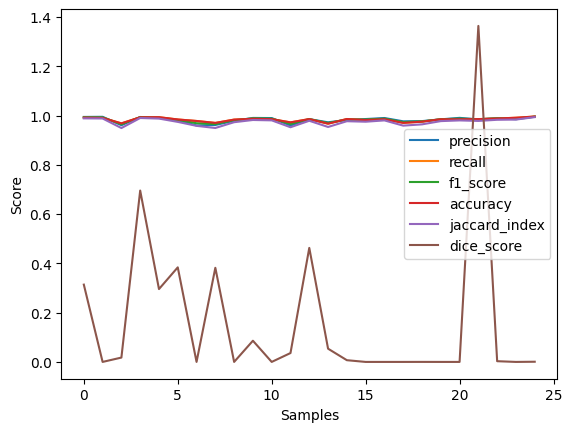

In [ ]:
# Perform Evaluation Metrics
def calculate_metrics(true_dir, pred_dir):
    metrics = {
        "precision": [],
        "recall": [],
        "f1_score": [],
        "accuracy": [],
        "jaccard_index": [],
        "dice_score": []
    }

    for true_file in os.listdir(true_dir):
        if true_file.endswith(".nii.gz"):
            true_path = os.path.join(true_dir, true_file)
            pred_path = os.path.join(pred_dir, true_file)

            if not os.path.exists(pred_path):
                print(f"Prediction file {pred_path} does not exist.")
                continue

            true_img = nib.load(true_path).get_fdata().astype(int).flatten()
            pred_img = nib.load(pred_path).get_fdata().astype(int).flatten()

            metrics["precision"].append(precision_score(true_img, pred_img, average='weighted', zero_division=0))
            metrics["recall"].append(recall_score(true_img, pred_img, average='weighted', zero_division=0))
            metrics["f1_score"].append(f1_score(true_img, pred_img, average='weighted', zero_division=0))
            metrics["accuracy"].append(accuracy_score(true_img, pred_img))
            metrics["jaccard_index"].append(jaccard_score(true_img, pred_img, average='weighted', zero_division=0))
            metrics["dice_score"].append(1 - dice(true_img, pred_img))

    for metric, values in metrics.items():
        print(f"{metric.capitalize()}: {np.mean(values):.4f}")

    return metrics

metrics = calculate_metrics('/content/nnUNet_raw/Dataset001_BrainTumour/labelsTr', "/content/predictions")

# Visualization of Metrics
def plot_metrics(metrics):
    fig, ax = plt.subplots()
    for metric, values in metrics.items():
        ax.plot(values, label=metric)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Score')
    ax.legend(loc='best')
    plt.show()

plot_metrics(metrics)

Precision: 0.9823
Recall: 0.9833
F1_score: 0.9827
Accuracy: 0.9833
Jaccard_index: 0.9745


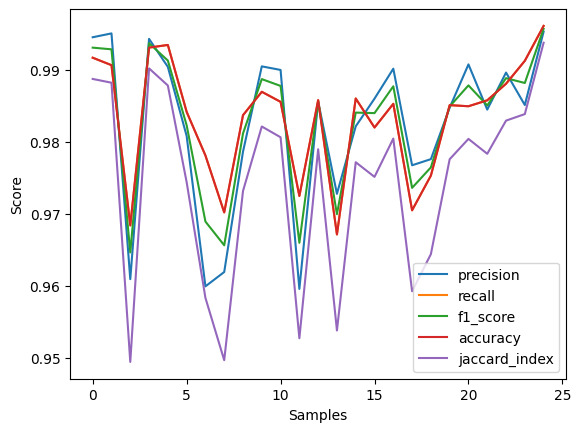

In [ ]:
# Visualization of Metrics
def plot_metrics(metrics):
    fig, ax = plt.subplots()
    for metric in metrics:
        if metric != "dice_score":
            ax.plot(metrics[metric], label=metric)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Score')
    ax.legend(loc='best')
    plt.show()

# Print metrics without dice score
def print_metrics(metrics):
    for metric, values in metrics.items():
        if metric != "dice_score":
            print(f"{metric.capitalize()}: {np.mean(values):.4f}")

# Print and plot metrics
print_metrics(metrics)
plot_metrics(metrics)

Prediction file /content/predictions/BRATS_041.nii.gz does not exist.
Prediction file /content/predictions/BRATS_032.nii.gz does not exist.
Prediction file /content/predictions/BRATS_060.nii.gz does not exist.
Prediction file /content/predictions/BRATS_044.nii.gz does not exist.
Prediction file /content/predictions/BRATS_036.nii.gz does not exist.
Prediction file /content/predictions/BRATS_059.nii.gz does not exist.
Prediction file /content/predictions/BRATS_037.nii.gz does not exist.
Prediction file /content/predictions/BRATS_047.nii.gz does not exist.
Prediction file /content/predictions/BRATS_039.nii.gz does not exist.
Prediction file /content/predictions/BRATS_046.nii.gz does not exist.
Prediction file /content/predictions/BRATS_053.nii.gz does not exist.
Prediction file /content/predictions/BRATS_054.nii.gz does not exist.
Prediction file /content/predictions/BRATS_052.nii.gz does not exist.
Prediction file /content/predictions/BRATS_034.nii.gz does not exist.
Prediction file /con

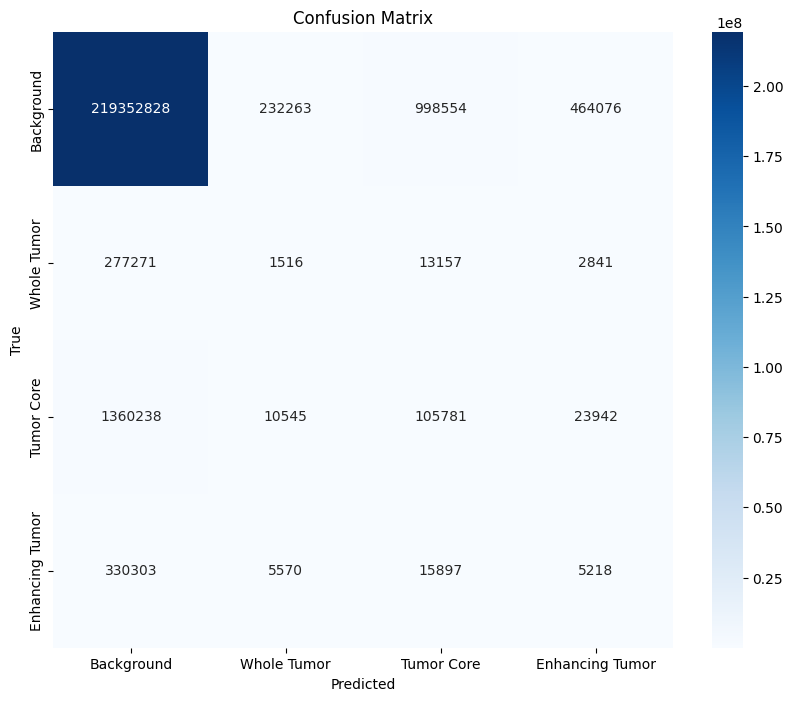

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(true_dir, pred_dir, class_names):
    y_true = []
    y_pred = []

    for true_file in os.listdir(true_dir):
        if true_file.endswith(".nii.gz"):
            true_path = os.path.join(true_dir, true_file)
            pred_path = os.path.join(pred_dir, true_file)

            if not os.path.exists(pred_path):
                print(f"Prediction file {pred_path} does not exist.")
                continue

            true_img = nib.load(true_path).get_fdata().astype(int).flatten()
            pred_img = nib.load(pred_path).get_fdata().astype(int).flatten()

            y_true.extend(true_img)
            y_pred.extend(pred_img)

    cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Sınıf isimleri tanımlama (Örnek olarak)
class_names = ['Background', 'Whole Tumor', 'Tumor Core', 'Enhancing Tumor']
plot_confusion_matrix('/content/nnUNet_raw/Dataset001_BrainTumour/labelsTr', "/content/predictions", class_names)


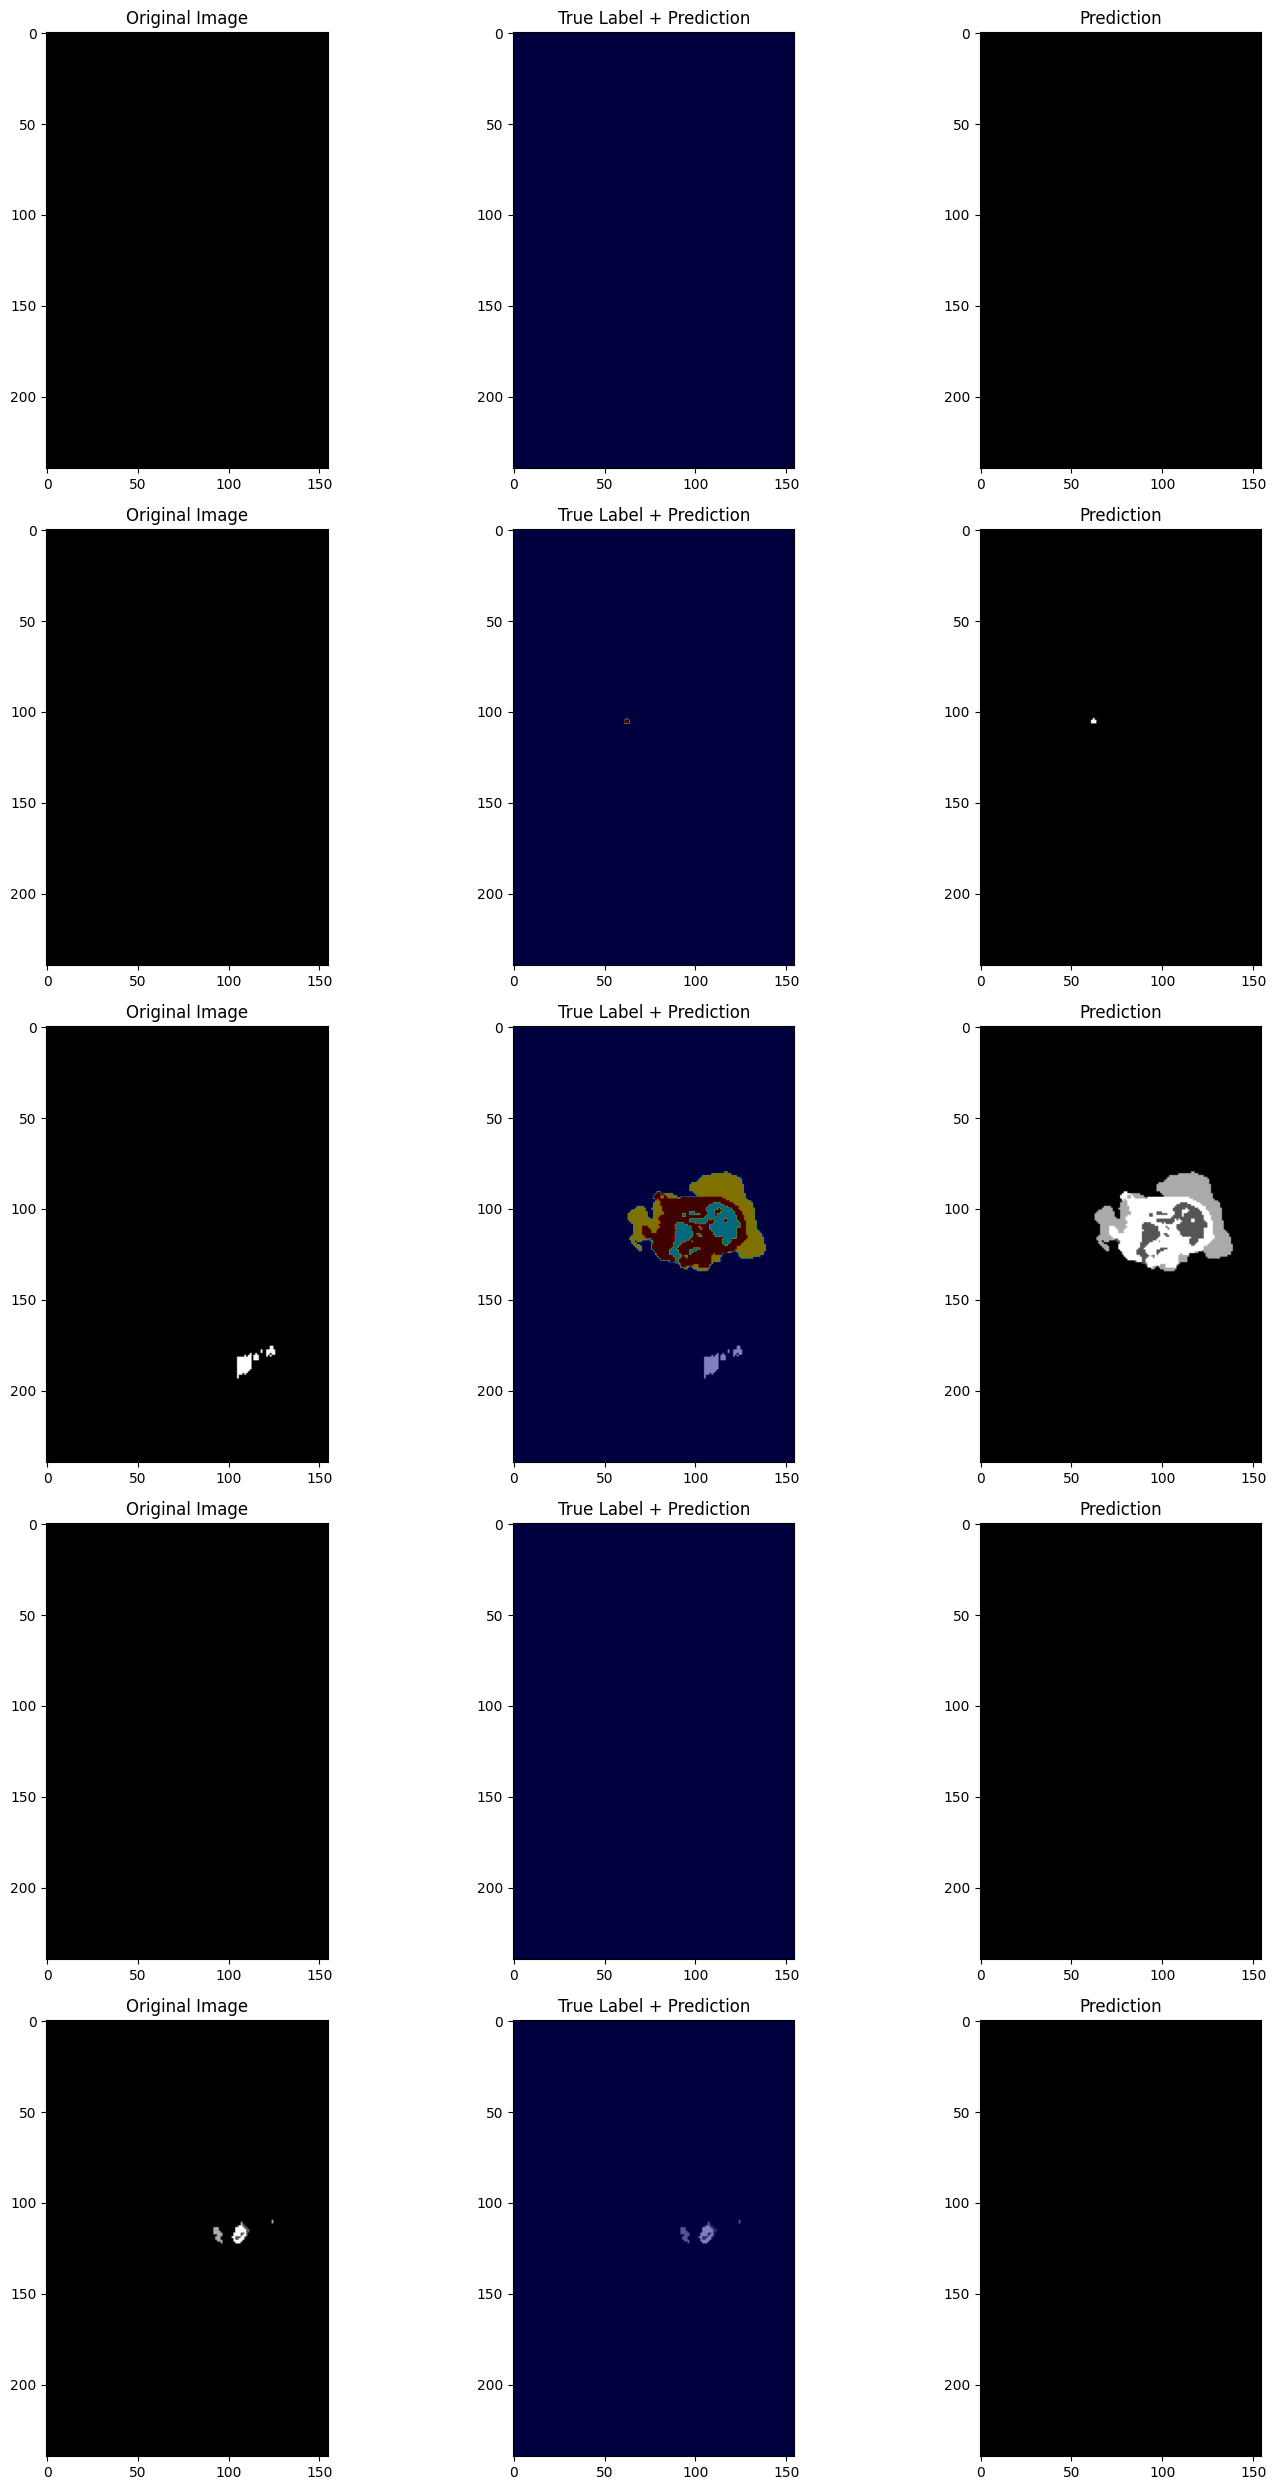

In [ ]:
def show_predictions(true_dir, pred_dir, num_samples=5):
    true_files = [f for f in os.listdir(true_dir) if f.endswith('.nii.gz')]
    pred_files = [f for f in os.listdir(pred_dir) if f.endswith('.nii.gz')]

    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))

    for i in range(num_samples):
        true_img = nib.load(os.path.join(true_dir, true_files[i])).get_fdata()
        pred_img = nib.load(os.path.join(pred_dir, pred_files[i])).get_fdata()

        # Ortadan bir dilimi seçelim
        slice_idx = true_img.shape[0] // 2

        axes[i, 0].imshow(true_img[slice_idx, :, :], cmap='gray')
        axes[i, 0].set_title('Original Image')

        axes[i, 1].imshow(true_img[slice_idx, :, :], cmap='gray')
        axes[i, 1].imshow(pred_img[slice_idx, :, :], cmap='jet', alpha=0.5)
        axes[i, 1].set_title('True Label + Prediction')

        axes[i, 2].imshow(pred_img[slice_idx, :, :], cmap='gray')
        axes[i, 2].set_title('Prediction')

    plt.tight_layout()
    plt.show()

# Tahmin dosyalarını göster
show_predictions('/content/nnUNet_raw/Dataset001_BrainTumour/labelsTr', "/content/predictions")


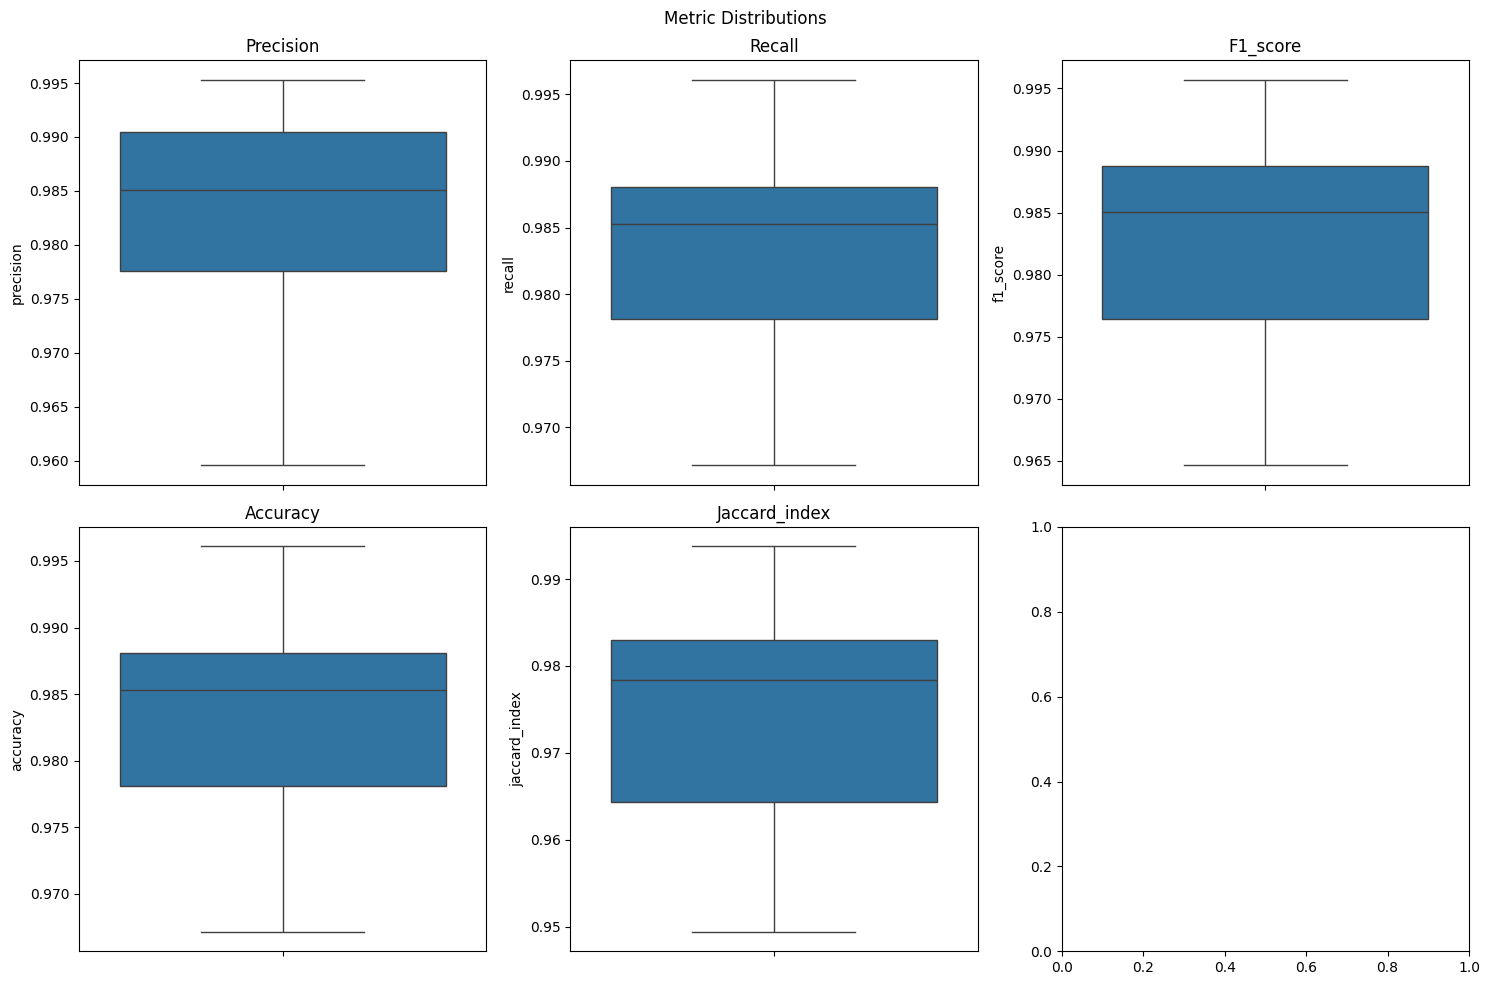

In [ ]:
import seaborn as sns
import pandas as pd

def plot_metric_distributions(metrics):
    metrics_df = pd.DataFrame(metrics)
    metrics_df = metrics_df.drop(columns=['dice_score'])

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Metric Distributions')

    for ax, metric in zip(axes.flatten(), metrics_df.columns):
        sns.boxplot(data=metrics_df[metric], ax=ax)
        ax.set_title(metric.capitalize())

    plt.tight_layout()
    plt.show()

plot_metric_distributions(metrics)


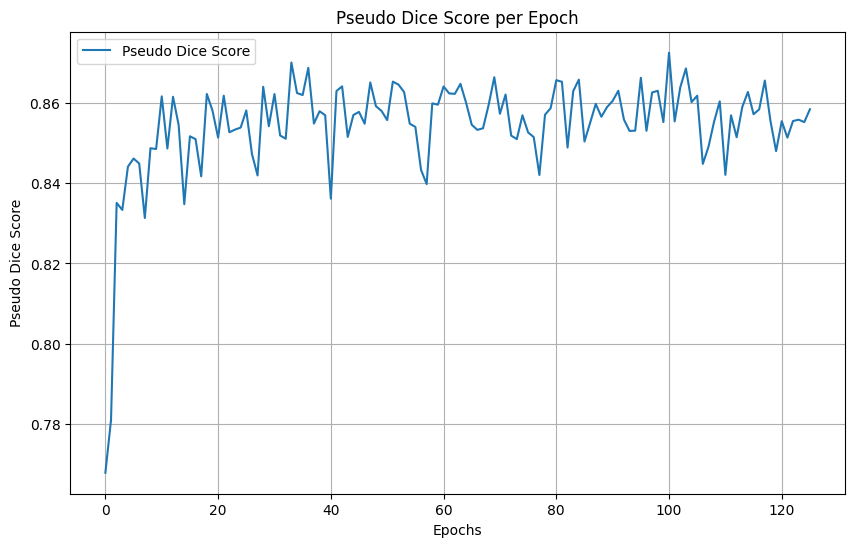

In [ ]:
import matplotlib.pyplot as plt
import re
import os

# Eğitim log dosyasını okuma fonksiyonu
def read_training_log(file_path):
    epochs = []
    dice_scores = []

    with open(file_path, 'r') as file:
        for line in file:
            if "Pseudo dice" in line:
                match = re.search(r"Pseudo dice \[(.*?)\]", line)
                if match:
                    scores = match.group(1).split(', ')
                    avg_dice = sum([float(score) for score in scores]) / len(scores)
                    dice_scores.append(avg_dice)

            if "Epoch" in line and "Current learning rate" not in line:
                match = re.search(r"Epoch (\d+)", line)
                if match:
                    epochs.append(int(match.group(1)))

    # Ensure both lists have the same length
    if len(epochs) > len(dice_scores):
        epochs = epochs[:len(dice_scores)]
    elif len(dice_scores) > len(epochs):
        dice_scores = dice_scores[:len(epochs)]

    return epochs, dice_scores

# Eğitim log dosyasının yolu
log_file_path = '/content/nnUNet_results/Dataset001_BrainTumour/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/training_log_2024_6_20_22_59_23.txt'

# Log dosyasından verileri çekme
if os.path.exists(log_file_path):
    epochs, dice_scores = read_training_log(log_file_path)

    # Pseudo dice skorlarını epoch başına grafikleştirme
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, dice_scores, label='Pseudo Dice Score')
    plt.xlabel('Epochs')
    plt.ylabel('Pseudo Dice Score')
    plt.title('Pseudo Dice Score per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Log file not found at: {log_file_path}")


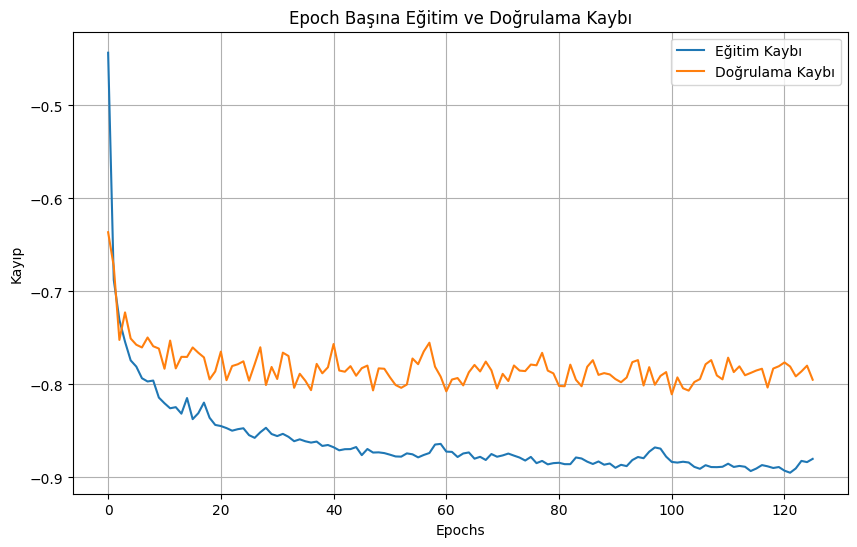

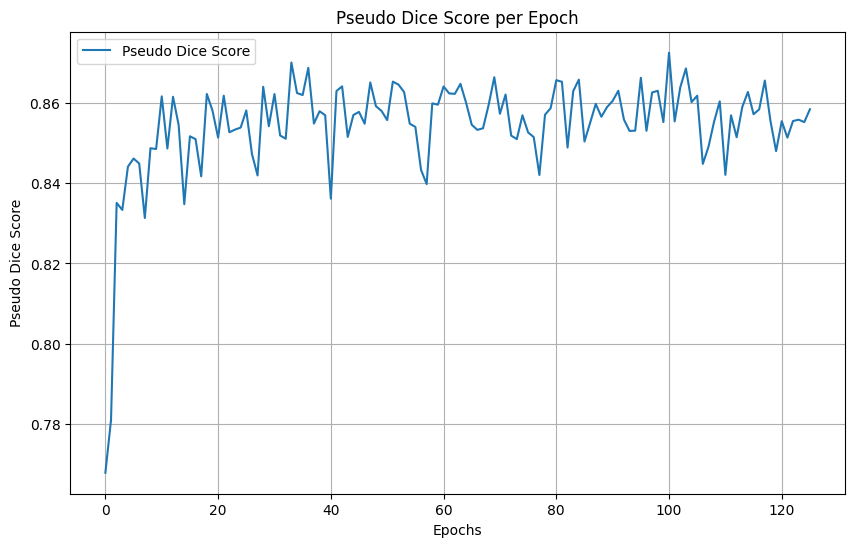

In [ ]:
import matplotlib.pyplot as plt
import re
import os

# Eğitim log dosyasını okuma fonksiyonu
def read_training_log(file_path):
    epochs = []
    train_losses = []
    val_losses = []
    dice_scores = []

    with open(file_path, 'r') as file:
        for line in file:
            if "Pseudo dice" in line:
                match = re.search(r"Pseudo dice \[(.*?)\]", line)
                if match:
                    scores = match.group(1).split(', ')
                    avg_dice = sum([float(score) for score in scores]) / len(scores)
                    dice_scores.append(avg_dice)

            if "Epoch" in line and "Current learning rate" not in line:
                match = re.search(r"Epoch (\d+)", line)
                if match:
                    epochs.append(int(match.group(1)))

            if "train_loss" in line:
                match = re.search(r"train_loss ([-+]?\d*\.\d+|\d+)", line)
                if match:
                    train_losses.append(float(match.group(1)))

            if "val_loss" in line:
                match = re.search(r"val_loss ([-+]?\d*\.\d+|\d+)", line)
                if match:
                    val_losses.append(float(match.group(1)))

    # Ensure all lists have the same length
    min_length = min(len(epochs), len(train_losses), len(val_losses), len(dice_scores))
    epochs = epochs[:min_length]
    train_losses = train_losses[:min_length]
    val_losses = val_losses[:min_length]
    dice_scores = dice_scores[:min_length]

    return epochs, train_losses, val_losses, dice_scores

# Eğitim log dosyasının yolu
log_file_path = '/content/nnUNet_results/Dataset001_BrainTumour/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/training_log_2024_6_20_22_59_23.txt'

# Log dosyasından verileri çekme
if os.path.exists(log_file_path):
    epochs, train_losses, val_losses, dice_scores = read_training_log(log_file_path)

    # Eğitim kaybı grafikleştirme
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Eğitim Kaybı')
    plt.plot(epochs, val_losses, label='Doğrulama Kaybı')
    plt.xlabel('Epochs')
    plt.ylabel('Kayıp')
    plt.title('Epoch Başına Eğitim ve Doğrulama Kaybı')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Pseudo dice skorlarını epoch başına grafikleştirme
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, dice_scores, label='Pseudo Dice Score')
    plt.xlabel('Epochs')
    plt.ylabel('Pseudo Dice Score')
    plt.title('Pseudo Dice Score per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Log file not found at: {log_file_path}")


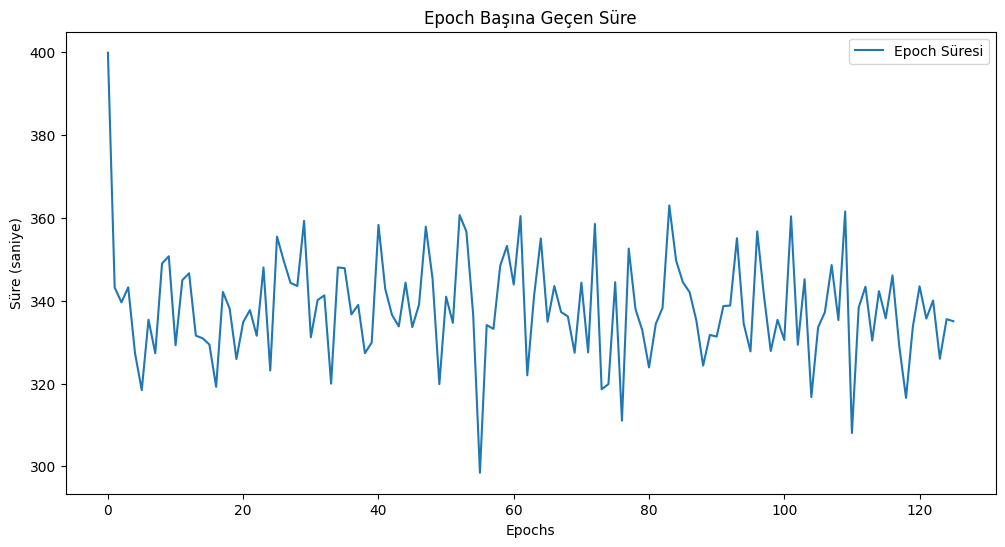

In [ ]:
import matplotlib.pyplot as plt

# Epoch sürelerini okuma
def read_epoch_times(file_path):
    epochs = []
    epoch_times = []

    with open(file_path, 'r') as file:
        current_epoch = None
        for line in file:
            if "Epoch " in line and "Current learning rate" not in line:
                parts = line.split()
                # Satırın formatını kontrol ederek doğru epoch numarasını çek
                for i, part in enumerate(parts):
                    if part.isdigit():
                        current_epoch = int(part)
                        break
            if "Epoch time:" in line:
                parts = line.split()
                epoch_time = float(parts[-2])
                epochs.append(current_epoch)
                epoch_times.append(epoch_time)

    return epochs, epoch_times

# Log dosyasından verileri çekme
epochs, epoch_times = read_epoch_times(log_file_path)

# Epoch sürelerini grafikleştirme
plt.figure(figsize=(12, 6))
plt.plot(epochs, epoch_times, label='Epoch Süresi')
plt.xlabel('Epochs')
plt.ylabel('Süre (saniye)')
plt.legend()
plt.title('Epoch Başına Geçen Süre')
plt.show()


In [ ]:
import zipfile
import os

# Klasörleri zip dosyasına ekleme
def zip_folders(folders, output_zip):
    with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for folder in folders:
            for root, dirs, files in os.walk(folder):
                for file in files:
                    zipf.write(os.path.join(root, file),
                               os.path.relpath(os.path.join(root, file),
                                               os.path.join(folder, '..')))

# Zip dosyasının adı ve klasörler
output_zip = '/content/nnUNet_data.zip'
folders_to_zip = ['/content/nnUNet_preprocessed', '/content/nnUNet_raw', '/content/nnUNet_results', '/content/predictions']

# Zip dosyasını oluşturma
zip_folders(folders_to_zip, output_zip)

# Zip dosyasını indirme
from google.colab import files
files.download(output_zip)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>